# Accuracy of peak counting with 'peak steepness'

---
*Author: Dezso Ribli*


In [1]:
from glob import glob
import os
import pickle
from generalized_peak_counting import PeakCount, rmse

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load data

In [2]:
fns = sorted(glob('/mnt/data/weaklens/guptadata/*/*.fits'))  # filenames

# parameters
sis = [float(os.path.basename(os.path.dirname(fn))[10:15]) for fn in fns]
oms = [float(os.path.basename(os.path.dirname(fn))[2:7]) for fn in fns]

### Initialize models

In [3]:
RES = 0.2  # angular resolution in arcmin

# original peak height statistics
pco = PeakCount(peak_counting_method = 'original',
                resolution_arcmin = RES,
                bins = np.linspace(-0.03,0.19,23))

# peak steepness statistics
pcr = PeakCount(peak_counting_method = 'roberts_cross', 
                resolution_arcmin = RES,
                bins = np.linspace(0,0.22,23))

### Calculate mean histograms and covariances

Note it takes hours!

In [ ]:
%%time
pco.fit(fns, oms, sis)
pcr.fit(fns, oms, sis)

### Predict parameters for each map

Note it takes hours!

In [ ]:
%%time
poo,pos = zip(*[pco.predict(fn) for fn in fns])
pro,prs = zip(*[pcr.predict(fn) for fn in fns])

### Evaluate errors

In [9]:
print 'Original peak_counting, RMSE Omega_m', rmse(oms,poo)
print 'Roberts cross peak_counting, RMSE Omega_m', rmse(oms,pro)
print
print 'Original peak_counting, RMSE sigma_8', rmse(sis,pos)
print 'Roberts cross peak_counting, RMSE sigma_8', rmse(sis,prs)

Original peak_counting, RMSE Omega_m 0.011460170825347117
Roberts cross peak_counting, RMSE Omega_m 0.0043019606118979824

Original peak_counting, RMSE sigma_8 0.022844661265686003
Roberts cross peak_counting, RMSE sigma_8 0.009701869332878844


### Plot predictions

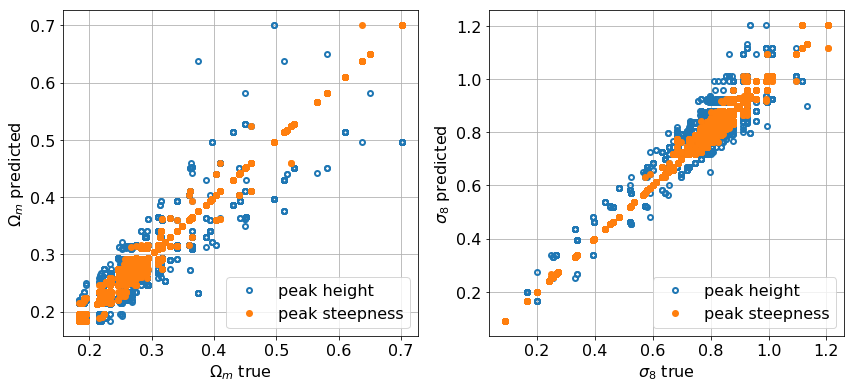

In [10]:
ms = 5
fs = 16
mew = 2.

figsize(14,6)
f,a = plt.subplots(1,2)

plt.sca(a[0])
plot(oms, poo,'o',ms=ms, mew=mew,mfc='none', label='peak height')
plot(oms, pro,'o',ms=ms, mew=mew, label='peak steepness')
legend(fontsize=fs, loc='lower right')
xlabel(r'$\Omega_m$ true', fontsize=fs)
ylabel(r'$\Omega_m$ predicted', fontsize=fs)
grid(which='both')
xticks(fontsize=fs)
yticks(fontsize=fs)

plt.sca(a[1])
plot(sis, pos,'o',ms=ms, mew=mew,mfc='none', label='peak height')
plot(sis, prs,'o',ms=ms, mew=mew, label='peak steepness')
legend(fontsize=fs, loc='lower right')
xlabel(r'$\sigma_8$ true', fontsize=fs)
ylabel(r'$\sigma_8$ predicted', fontsize=fs)
grid(which='both')
xticks(fontsize=fs)
yticks(fontsize=fs);

### Save models and predictions 

In [11]:
pickle.dump((pco, pcr, oms, sis, poo, pos, pro, prs),
            open('results.pkl','wb'))

# The end